In [54]:
import scanpy as sc
import hisepy
import os
import pandas as pd

In [37]:
def cache_uuid_path(uuid):
    cache_path = '/home/jupyter/cache/{u}'.format(u = uuid)
    if not os.path.isdir(cache_path):
        hise_res = hisepy.reader.cache_files([uuid])
    filename = os.listdir(cache_path)[0]
    cache_file = '{p}/{f}'.format(p = cache_path, f = filename)
    return cache_file

In [38]:
def read_adata_uuid(uuid):
    cache_file = cache_uuid_path(uuid)
    res = sc.read_h5ad(cache_file)
    return res

In [39]:
markers = ['CD3D', 'CD3E', 'FCN1', 'HBB', 'IL7R', 'MS4A1', 'PPBP']

In [44]:
nk_markers = markers + ['NCAM1','CD4', 'IL2RA', 'CD8A', 'ISG15','GZMB','GZMH','GZMK']

BR1_Female_Negative_CD56dim-NK-cell  
Check for better isolation of Erythrocytes with leiden clustering instead of louvain

In [6]:
h5ad_uuid = '54a90a65-dc08-453c-916e-298872131055'
adata = read_adata_uuid(h5ad_uuid)

In [7]:
scanpy.tl.leiden(adata, resolution = 2)

IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out


/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


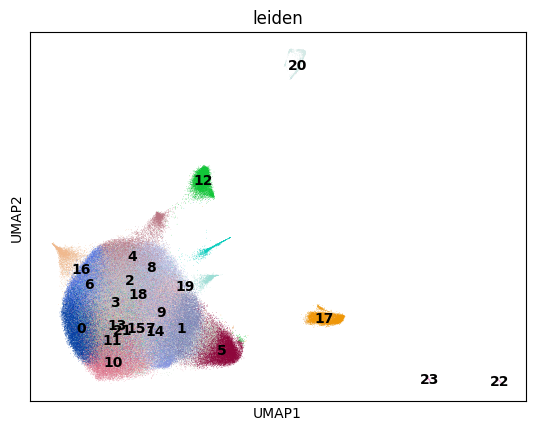

In [17]:
scanpy.pl.umap(adata, color = 'leiden', legend_loc = 'on data')

/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


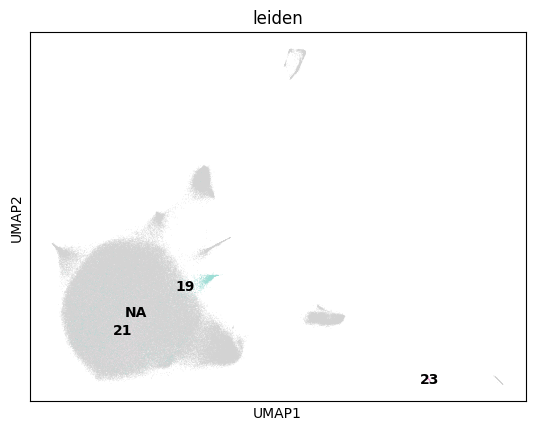

In [20]:
scanpy.pl.umap(adata, color = 'leiden', legend_loc = 'on data', groups = ['19','21','23'])

/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


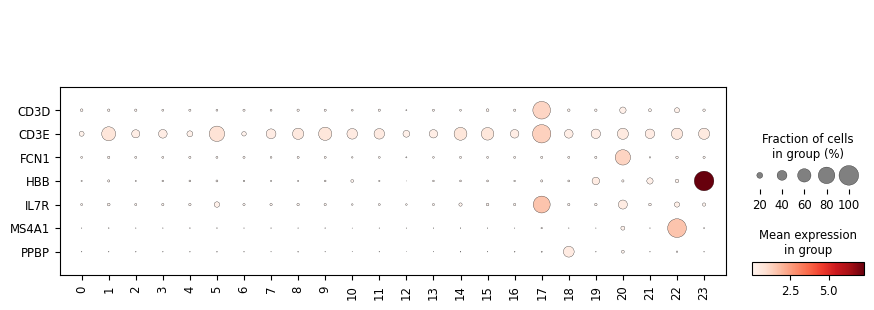

In [15]:
scanpy.pl.dotplot(adata, groupby = 'leiden', var_names = markers, swap_axes = True, log = True)

/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


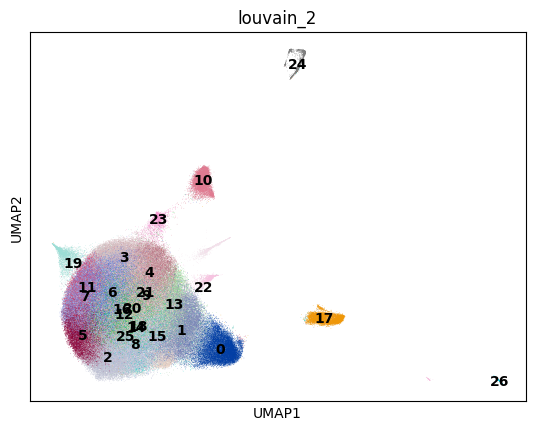

In [18]:
scanpy.pl.umap(adata, color = 'louvain_2', legend_loc = 'on data')

/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


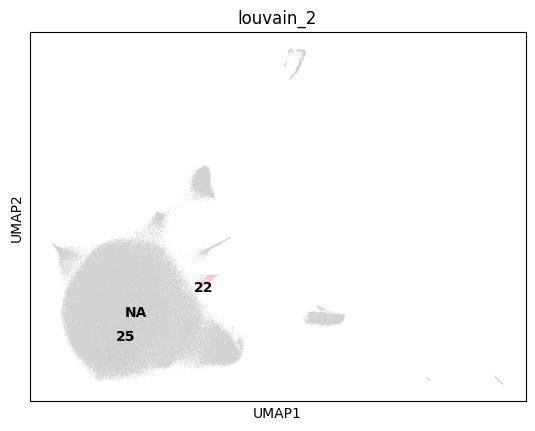

In [19]:
scanpy.pl.umap(adata, color = 'louvain_2', legend_loc = 'on data', groups = ['22','25'])

/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


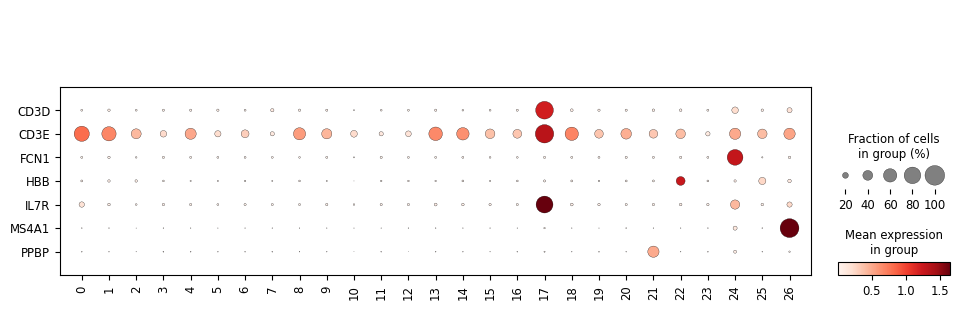

In [16]:
scanpy.pl.dotplot(adata, groupby = 'louvain_2', var_names = markers, swap_axes = True, log = True)

Result: Not a better way to separate HBB-positives. Subdivides one HBB+ cluster, but doesn't improve others. Better to adjust the threshhold.

BR1_Female_Positive_CD56dim-NK-cell  
Can other markers (e.g. CD4 or IL2RA and CD8A) better distinguish between NK-T doublets vs NK Adaptive cells?

In [21]:
h5ad_uuid = '330d1831-d684-4bc7-8394-6b97150dea75'
adata = read_adata_uuid(h5ad_uuid)

downloading fileID: 330d1831-d684-4bc7-8394-6b97150dea75
Files have been successfully downloaded!


/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


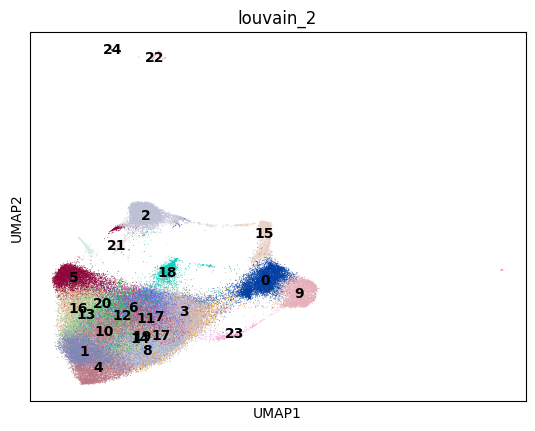

In [22]:
scanpy.pl.umap(adata, color = 'louvain_2', legend_loc = 'on data')

/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


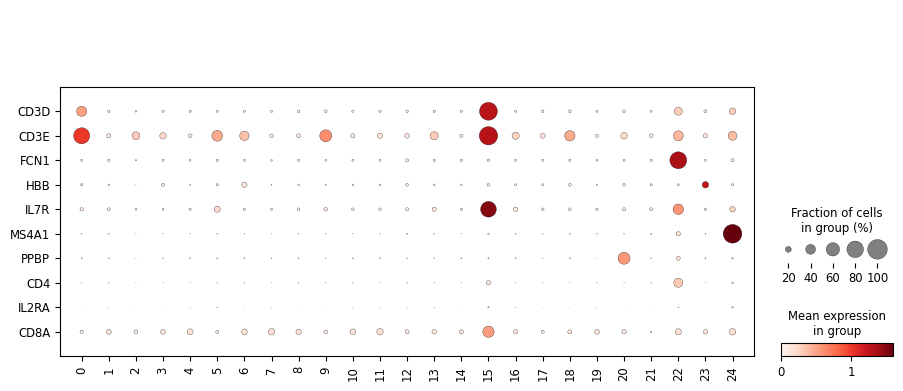

In [24]:
scanpy.pl.dotplot(adata, groupby = 'louvain_2', var_names = nk_markers, swap_axes = True, log = True)

BR1_Male_Positive_CD56dim-NK-cell  
Can other markers (e.g. CD4 or IL2RA and CD8A) better distinguish between NK-T doublets vs NK Adaptive cells?

In [25]:
h5ad_uuid = 'c07364b5-7d15-4afa-b59c-d9e3f080c535'
adata = read_adata_uuid(h5ad_uuid)

downloading fileID: c07364b5-7d15-4afa-b59c-d9e3f080c535
Files have been successfully downloaded!


/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


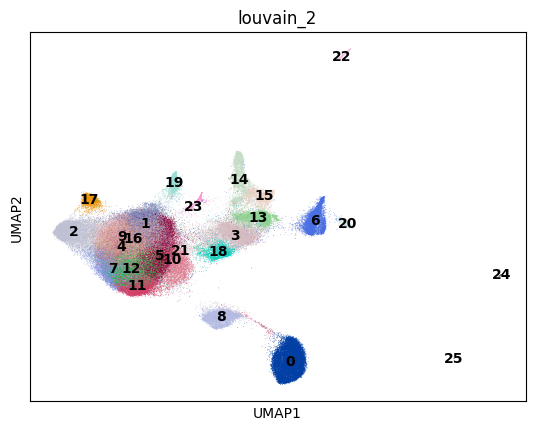

In [26]:
scanpy.pl.umap(adata, color = 'louvain_2', legend_loc = 'on data')

/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


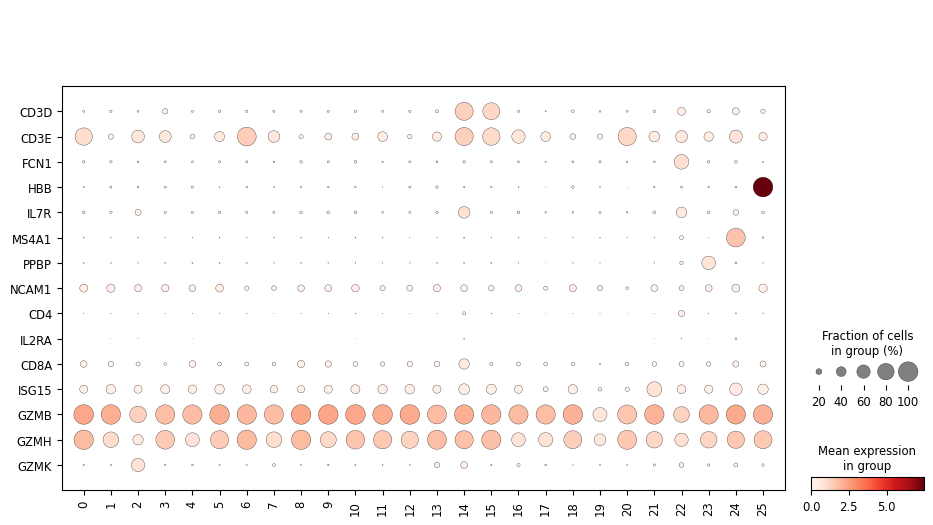

In [34]:
scanpy.pl.dotplot(adata, groupby = 'louvain_2', var_names = nk_markers, swap_axes = True, log = True)

Atlas data: do we see CD8+ cells in the clean reference dataset?

In [6]:
h5ad_uuid = 'ca86ce37-36c5-415a-af16-e324bfad6fd4'
adata = read_adata_uuid(h5ad_uuid)

In [7]:
adata.obs.columns

Index(['barcodes', 'batch_id', 'cell_name', 'cell_uuid', 'chip_id',
       'hto_barcode', 'hto_category', 'n_genes', 'n_mito_umis', 'n_reads',
       'n_umis', 'original_barcodes', 'pbmc_sample_id', 'pool_id', 'well_id',
       'sample.sampleKitGuid', 'cohort.cohortGuid', 'subject.subjectGuid',
       'subject.biologicalSex', 'subject.race', 'subject.ethnicity',
       'subject.birthYear', 'sample.visitName', 'sample.drawDate', 'file.id',
       'subject.cmv', 'subject.bmi', 'celltypist.low', 'seurat.l1',
       'seurat.l1.score', 'seurat.l2', 'seurat.l2.score', 'seurat.l2.5',
       'seurat.l2.5.score', 'seurat.l3', 'seurat.l3.score',
       'predicted_doublet', 'doublet_score', 'n_genes_by_counts',
       'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts',
       'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes',
       'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes',
       'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito',
       

/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


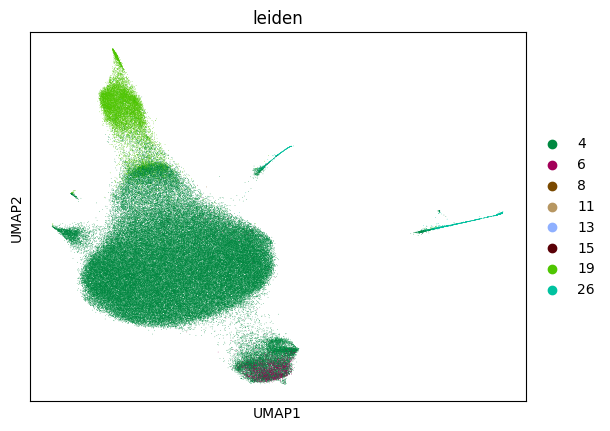

In [8]:
sc.pl.umap(adata, color = 'leiden')

/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


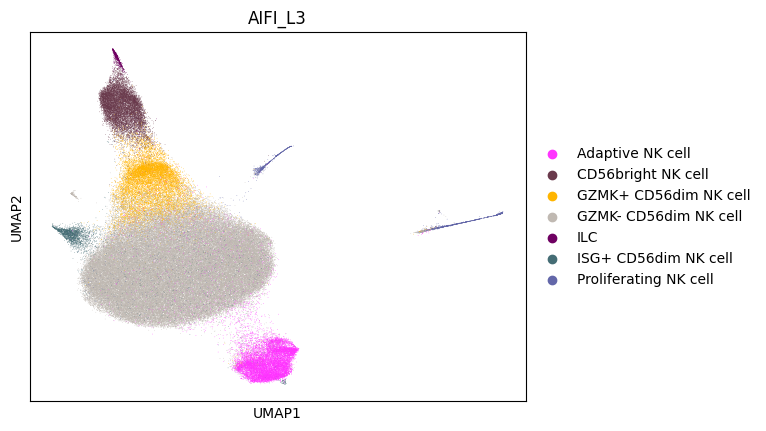

In [9]:
sc.pl.umap(adata, color = 'AIFI_L3')

/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


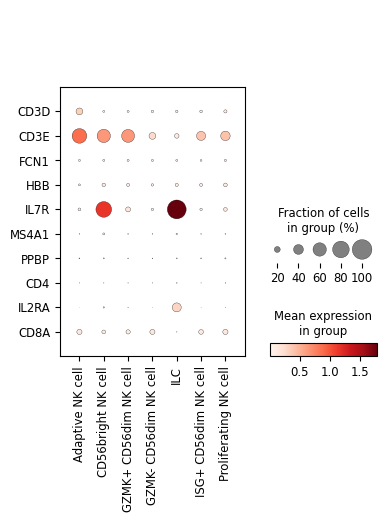

In [10]:
sc.pl.dotplot(
    adata,
    groupby = 'AIFI_L3',
    var_names = nk_markers,
    swap_axes = True,
    log = True
)

In [11]:
sc.tl.louvain(adata, resolution = 2, key_added = 'louvain_2')

/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


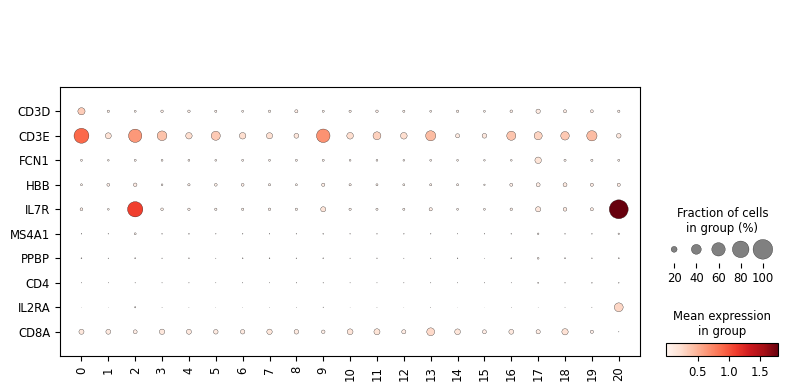

In [12]:
sc.pl.dotplot(
    adata,
    groupby = 'louvain_2',
    var_names = nk_markers,
    swap_axes = True,
    log = True
)

/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


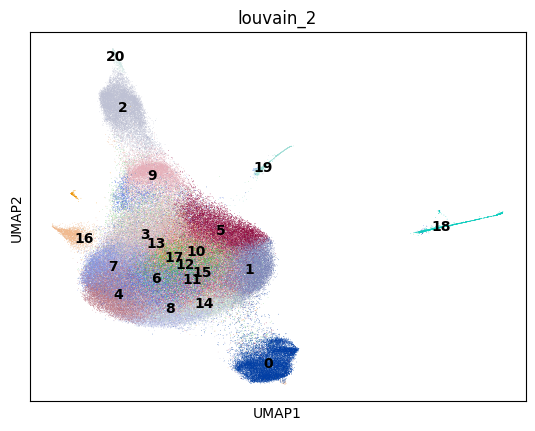

In [13]:
sc.pl.umap(adata, color = 'louvain_2', legend_loc = 'on data')

In [28]:
adaptive_adata = adata[adata.obs['louvain_2'] == '0'].copy()

In [29]:
adaptive_adata = adaptive_adata.raw.to_adata()
adaptive_adata.raw = adaptive_adata
sc.pp.normalize_total(adaptive_adata)
sc.pp.log1p(adaptive_adata)
sc.pp.highly_variable_genes(adaptive_adata)

/opt/conda/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


In [30]:
adaptive_adata = adaptive_adata[:, adaptive_adata.var_names[adaptive_adata.var['highly_variable']]].copy()

In [31]:
print('Scaling')
# Scale variable genes
sc.pp.scale(adaptive_adata)

print('PCA')
# Run PCA
sc.tl.pca(adaptive_adata, svd_solver = 'arpack')

print('Neighbors')
# Find nearest neighbors
sc.pp.neighbors(
    adaptive_adata, 
    n_neighbors = 50,
    n_pcs = 30
)

Scaling
PCA
Neighbors


In [32]:
print('Louvain')
# Find clusters
sc.tl.louvain(
    adaptive_adata, 
    resolution = 2, 
    key_added = 'louvain_2'
)

print('UMAP')
# Run UMAP
sc.tl.umap(adaptive_adata, min_dist = 0.05)

Louvain
UMAP


/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


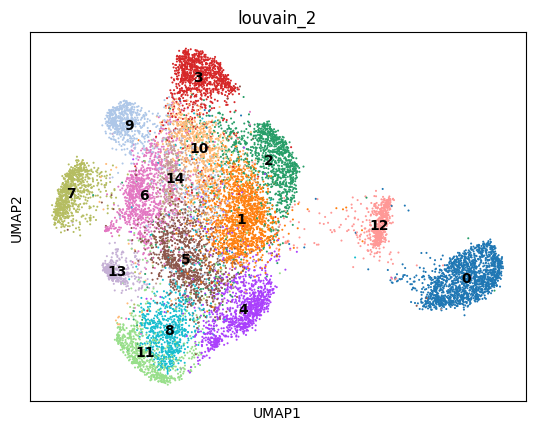

In [33]:
sc.pl.umap(adaptive_adata, color = 'louvain_2', legend_loc = 'on data')

In [34]:
adaptive_adata = adaptive_adata.raw.to_adata()
sc.pp.normalize_total(adaptive_adata)
sc.pp.log1p(adaptive_adata)

/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


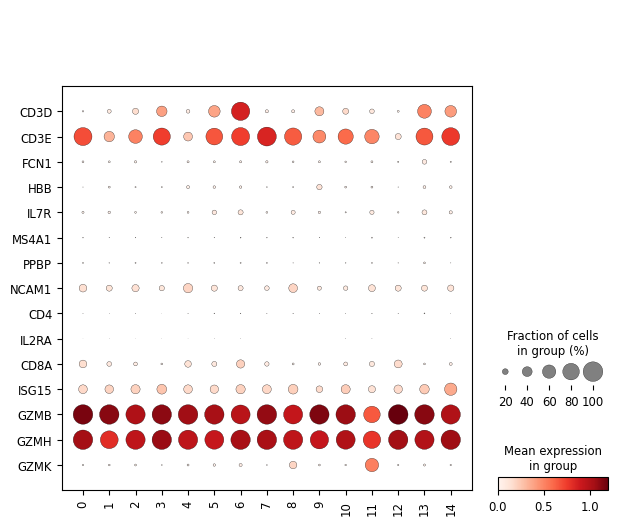

In [46]:
sc.pl.dotplot(
    adaptive_adata,
    groupby = 'louvain_2',
    var_names = nk_markers,
    swap_axes = True,
    log = True
)

It looks like there's some CD3+CD8A+ cells among the Adaptive NK cells. These aren't outliers, but pretty central to these cells. No CD4+ cells, though, so we can cleanly remove those.

What about CD56bright cells?

In [41]:
h5ad_uuid = '6da0bd94-d6bb-40bc-8224-b76a0fb318a8'
adata = read_adata_uuid(h5ad_uuid)

downloading fileID: 6da0bd94-d6bb-40bc-8224-b76a0fb318a8
Files have been successfully downloaded!


/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


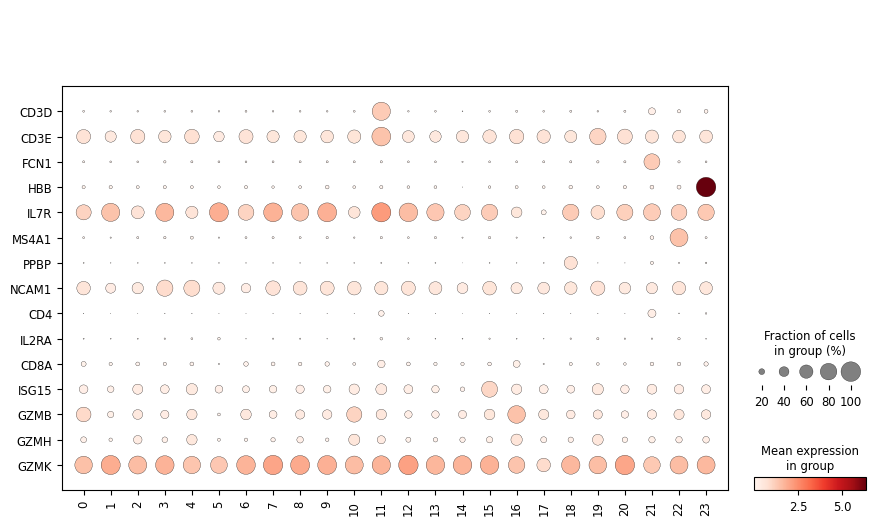

In [45]:
sc.pl.dotplot(adata, groupby = 'louvain_2', var_names = nk_markers, swap_axes = True, log = True)

/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


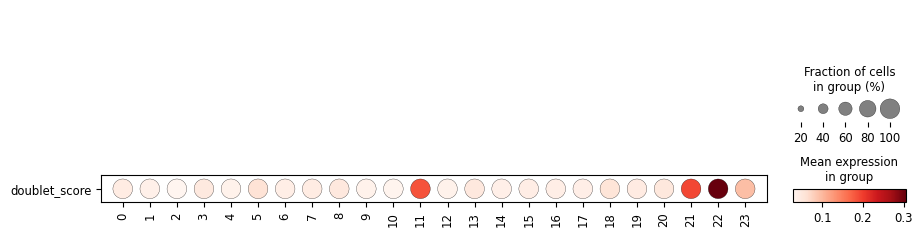

In [47]:
sc.pl.dotplot(adata, groupby = 'louvain_2', var_names = 'doublet_score', swap_axes = True, log = False)

/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


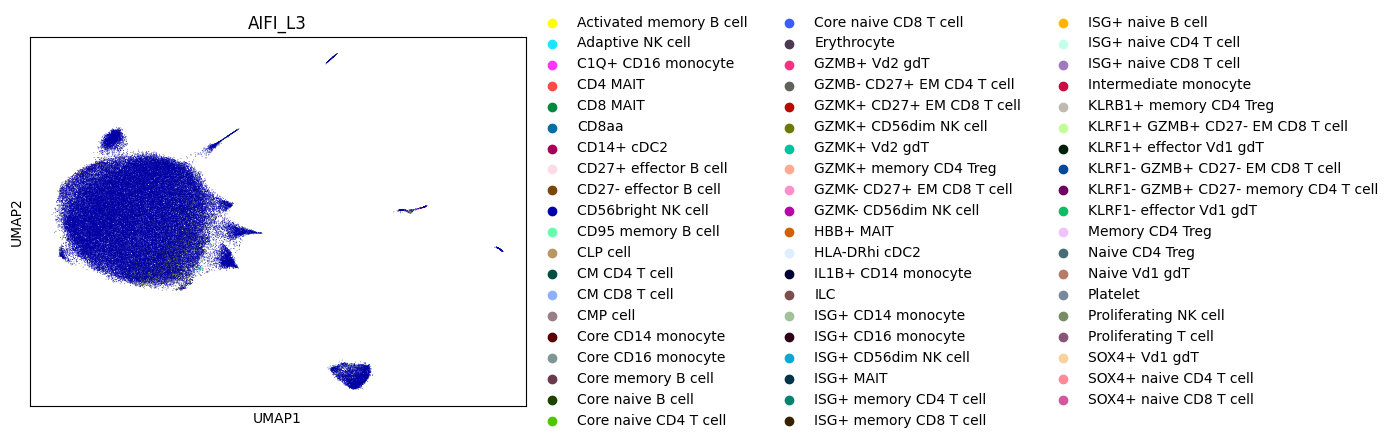

In [48]:
sc.pl.umap(adata, color = 'AIFI_L3')

BR2_Female_Positive_Memory-CD8-T-cell  
Needs different clustering? HBB-positives mixed with main group

In [49]:
h5ad_uuid = '80859337-9223-4684-947e-7f3c9eb64604'
adata = read_adata_uuid(h5ad_uuid)

downloading fileID: 80859337-9223-4684-947e-7f3c9eb64604
Files have been successfully downloaded!


/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


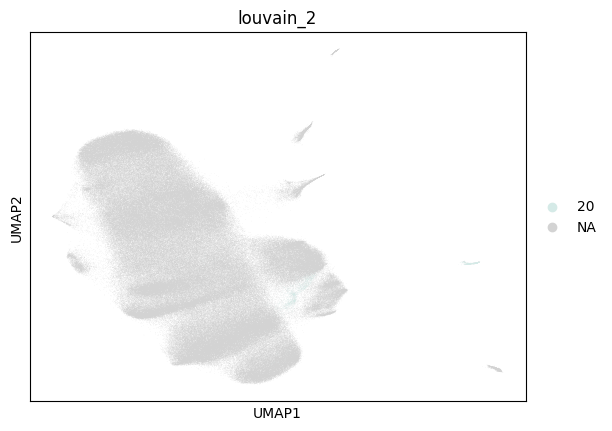

In [52]:
sc.pl.umap(adata, color = 'louvain_2', groups = ['20'])

In [76]:
def select_clusters_by_low_gene_frac(adata, n_cutoff, frac_cutoff, clusters = 'louvain_2'):

    obs = adata.obs
    n_cells = obs.groupby(clusters)['barcodes'].count()

    low_obs = obs['n_genes'] < n_cutoff
    n_low = obs[low_obs].groupby(clusters)['barcodes'].count()

    frac_low = n_low / n_cells
    low_cl = frac_low[frac_low > frac_cutoff]
    low_cl = low_cl.index.tolist()

    return low_cl

In [77]:
select_clusters_by_low_gene_frac(
    adata,
    750,
    0.3,
    'louvain_2'
)

/tmp/ipykernel_1413/898831675.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  n_cells = obs.groupby(clusters)['barcodes'].count()
/tmp/ipykernel_1413/898831675.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  n_low = obs[low_obs].groupby(clusters)['barcodes'].count()


['21']

In [53]:
obs = adata.obs

In [66]:
n_cells = obs.groupby('louvain_2')['barcodes'].count()

/tmp/ipykernel_1413/685341583.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  n_cells = obs.groupby('louvain_2')['barcodes'].count()


In [71]:
n_low_genes = obs[obs['n_genes'] < 750].groupby('louvain_2')['barcodes'].count()

/tmp/ipykernel_1413/2675911813.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  n_low_genes = obs[obs['n_genes'] < 750].groupby('louvain_2')['barcodes'].count()


In [73]:
frac_low = n_low_genes / n_cells

In [75]:
frac_low[frac_low > 0.3].index.tolist()

['21']